In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Constants
DATA_DIRECTORY = '/content/drive/MyDrive/Vegetable Image Dataset/Vegetable Images'

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10
----------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Loss: 2.3514 Acc: 0.1681
validation Loss: 2.0553 Acc: 0.2373
Epoch 2/10
----------
train Loss: 2.0154 Acc: 0.2605
validation Loss: 1.7503 Acc: 0.3700
Epoch 3/10
----------
train Loss: 1.8381 Acc: 0.3450
validation Loss: 1.5794 Acc: 0.4473
Epoch 4/10
----------
train Loss: 1.5930 Acc: 0.4400
validation Loss: 1.3509 Acc: 0.5461
Epoch 5/10
----------
train Loss: 1.4252 Acc: 0.5101
validation Loss: 1.1260 Acc: 0.6070
Epoch 6/10
----------
train Loss: 1.2774 Acc: 0.5727
validation Loss: 0.8441 Acc: 0.7115
Epoch 7/10
----------
train Loss: 1.1218 Acc: 0.6275
validation Loss: 0.8400 Acc: 0.7028
Epoch 8/10
----------
train Loss: 1.0359 Acc: 0.6545
validation Loss: 0.7590 Acc: 0.7328
Epoch 9/10
----------
train Loss: 0.9079 Acc: 0.6982
validation Loss: 0.5699 Acc: 0.8070
Epoch 10/10
----------
train Loss: 0.7935 Acc: 0.7431
validation Loss: 0.5387 Acc: 0.8326
Best validation Acc: 0.832612


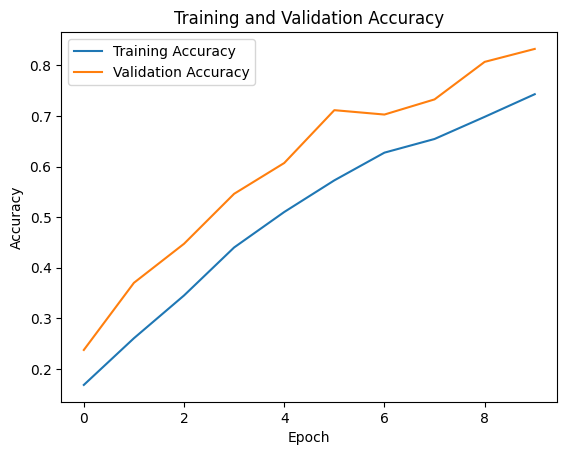

Epoch 1/10
----------
train Loss: 5600801381.4560 Acc: 0.0686
validation Loss: 2.7135 Acc: 0.0666
Epoch 2/10
----------
train Loss: 2.7119 Acc: 0.0683
validation Loss: 2.7098 Acc: 0.0666
Epoch 3/10
----------
train Loss: 2.7117 Acc: 0.0667
validation Loss: 2.7097 Acc: 0.0666
Epoch 4/10
----------
train Loss: 2.7114 Acc: 0.0618
validation Loss: 2.7088 Acc: 0.0682
Epoch 5/10
----------
train Loss: 2.7106 Acc: 0.0636
validation Loss: 2.7096 Acc: 0.0666
Epoch 6/10
----------
train Loss: 2.7098 Acc: 0.0670
validation Loss: 2.7093 Acc: 0.0666
Epoch 7/10
----------
train Loss: 2.7106 Acc: 0.0615
validation Loss: 2.7094 Acc: 0.0666
Epoch 8/10
----------
train Loss: 2.7099 Acc: 0.0663
validation Loss: 2.7087 Acc: 0.0666
Epoch 9/10
----------
train Loss: 2.7102 Acc: 0.0632
validation Loss: 2.7094 Acc: 0.0666
Epoch 10/10
----------
train Loss: 2.7099 Acc: 0.0631
validation Loss: 2.7085 Acc: 0.0666
Best validation Acc: 0.068220


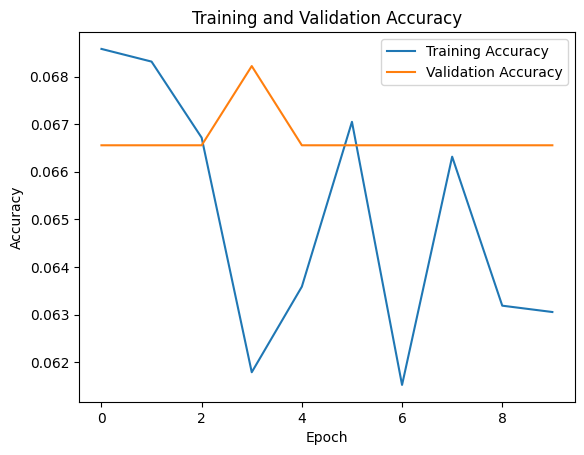

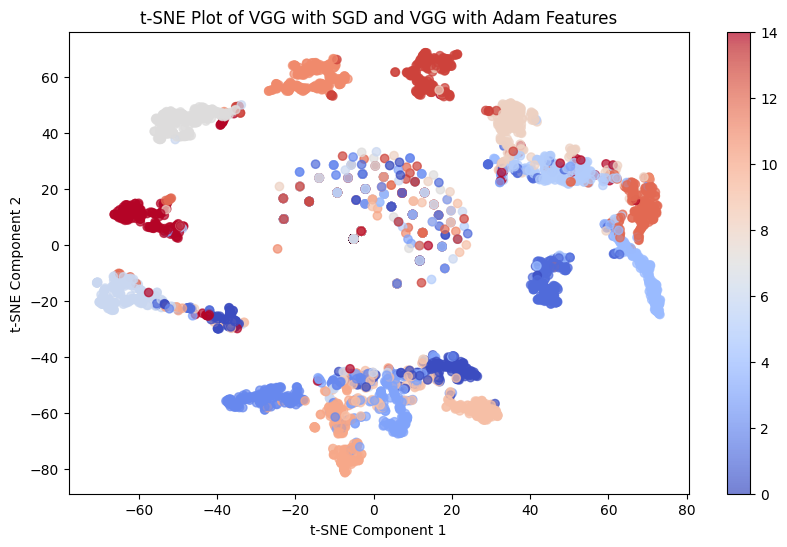

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE

# Constants
DATA_DIRECTORY = '/content/drive/MyDrive/Vegetable Image Dataset/Vegetable Images'
BATCH_SIZE = 64
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.vgg16(pretrained=False)
    for param in model.parameters():
        param.requires_grad = True
    num_output_classes = len(image_datasets['train'].classes)
    model.classifier[6] = nn.Sequential(
        nn.Linear(4096, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, num_output_classes)
    )
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            if phase == 'train':
                train_acc_history.append(epoch_acc.item())
            else:
                val_acc_history.append(epoch_acc.item())

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

        if val_acc_history[-1] > best_acc:
            best_acc = val_acc_history[-1]

    print('Best validation Acc: {:4f}'.format(best_acc))

    plt.plot(range(len(train_acc_history)), train_acc_history, label='Training Accuracy')
    plt.plot(range(len(val_acc_history)), val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    print(classification_report(y_true, y_pred, target_names=image_datasets['test'].classes))

    return y_true, y_pred

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def extract_features(model, dataloader):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            features_list.append(outputs.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    features = np.concatenate(features_list)
    labels = np.concatenate(labels_list)

    return features, labels

# Load datasets
image_datasets = load_datasets()

# Create dataloaders
dataloaders = create_dataloaders(image_datasets)

# Setup model
model = setup_model()

# Criterion
criterion = nn.CrossEntropyLoss()

# Optimizers
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model.parameters(), lr=0.01)

# Train model with SGD optimizer
train_model(model, criterion, optimizer_sgd, num_epochs=10)

# Extract features from VGG with SGD
vgg_sgd_features, vgg_sgd_labels = extract_features(model, dataloaders['test'])

# Train model with Adam optimizer
train_model(model, criterion, optimizer_adam, num_epochs=10)

# Extract features from VGG with Adam
vgg_adam_features, vgg_adam_labels = extract_features(model, dataloaders['test'])

# Concatenate features and labels from both optimizers
combined_features = np.concatenate([vgg_sgd_features, vgg_adam_features])
combined_labels = np.concatenate([vgg_sgd_labels, vgg_adam_labels])

# Apply t-SNE to the combined features
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(combined_features)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=combined_labels, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE Plot of VGG with SGD and VGG with Adam Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()
